Step 1. Follow along with the tutorial to gain an understanding of the process

Step 2. In a new .ipynb notebook, reproduce the results utilizing the "QMNIST" dataset

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
# Load QMNIST dataset and preprocess
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.QMNIST(root='QMNIST_data/', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.QMNIST(root='QMNIST_data/', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

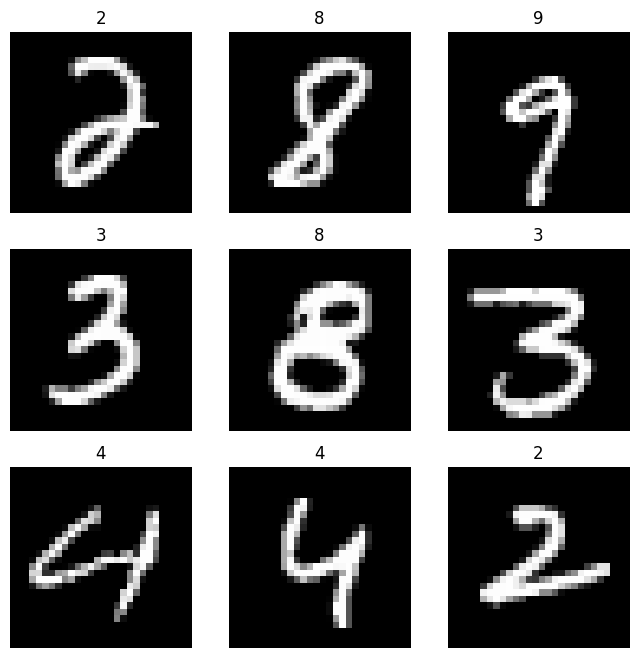

In [3]:
labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

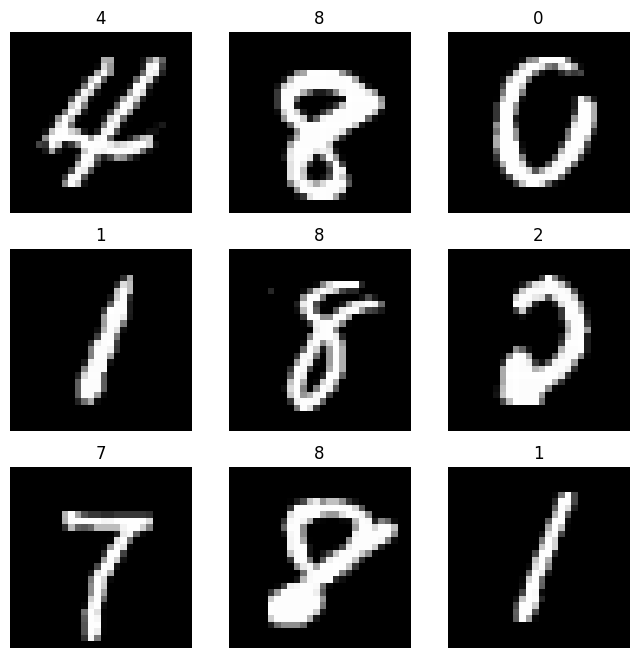

In [4]:
#Test DataSet
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(test_dataset), size=(1,)).item()
    img, label = test_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [5]:
#Define the neural network architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP()


In [6]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.0654954862594606
Epoch 1, Batch 200, Loss: 0.4419629918038845
Epoch 1, Batch 300, Loss: 0.37501726672053337
Epoch 1, Batch 400, Loss: 0.35023732617497444
Epoch 1, Batch 500, Loss: 0.3229886184632778
Epoch 1, Batch 600, Loss: 0.29380278013646605
Epoch 1, Batch 700, Loss: 0.28290516033768653
Epoch 1, Batch 800, Loss: 0.25083894409239293
Epoch 1, Batch 900, Loss: 0.23781322933733462
Epoch 2, Batch 100, Loss: 0.2298619392886758
Epoch 2, Batch 200, Loss: 0.20127057921141386
Epoch 2, Batch 300, Loss: 0.20311912812292576
Epoch 2, Batch 400, Loss: 0.20230478174984456
Epoch 2, Batch 500, Loss: 0.17818733137100934
Epoch 2, Batch 600, Loss: 0.16852409102022647
Epoch 2, Batch 700, Loss: 0.17225113771855832
Epoch 2, Batch 800, Loss: 0.16857536001130938
Epoch 2, Batch 900, Loss: 0.1693302559480071
Epoch 3, Batch 100, Loss: 0.14633923646062613
Epoch 3, Batch 200, Loss: 0.13736406488344075
Epoch 3, Batch 300, Loss: 0.13704582005739213
Epoch 3, Batch 400, Loss: 0.13955391487

Step 3. Report on the results in terms of prediction accuracy on the train and test datasets

In [7]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { (correct / total)*100}%')

Accuracy on test set: 95.62666666666667%


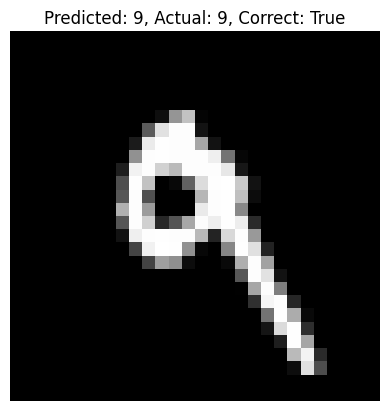

In [8]:
model.eval()  # Set model to evaluation mode

# Get a batch of test images and labels
images, labels = next(iter(test_loader))
image, true_label = images[7], labels[7]  # Select the first image for checking

# Predict the label for the selected image
with torch.no_grad():  # No need for gradient computation here
    output = model(image.unsqueeze(0))
    _, predicted_label = torch.max(output, 1)

# Check if the prediction is correct
is_correct = predicted_label == true_label

# Visualize the image and prediction result
plt.imshow(image.squeeze(), cmap='gray')  # Remove channel dimension for visualization
plt.title(f'Predicted: {predicted_label.item()}, Actual: {true_label.item()}, Correct: {is_correct.item()}')
plt.axis('off')
plt.show()

Step 4. Choose one of the proposed modifications below:

Add another Dense layer of 128 nodes

Increase the current number of nodes in the layer to 256

Hypothesize how it would change the performance results

Addition of another Dense Layer of 128 nodes

Hypothesis: Introducing an extra dense layer with 128 nodes is anticipated to augment the model's capability to discern more intricate attributes in the input data, thereby potentially enhancing its capacity to learn. Such a modification could lead to improved accuracy on the training dataset as the model may better adapt to the data specifics. However, this adjustment carries the potential for overfitting, characterized by high performance on training data but diminished effectiveness on novel, unseen data due to the model's adaptation to the training set's specificities rather than general patterns. Therefore, it is essential to vigilantly observe for signs of overfitting and consider implementing regularization strategies to ensure the model retains its ability to generalize well to new data.

Step 5. Modify the model based on the chosen method and train

In [9]:
class MLP_Modified_AddLayer(nn.Module):
    def __init__(self):
        super(MLP_Modified_AddLayer, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc2_5 = nn.Linear(64, 128)  # Additional layer
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc2_5(x))  # Pass through the new layer
        x = self.fc3(x)
        return x

model1 = MLP_Modified_AddLayer()

In [10]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model1.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model1.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.083802504837513
Epoch 1, Batch 200, Loss: 0.46980182334780696
Epoch 1, Batch 300, Loss: 0.3907969047129154
Epoch 1, Batch 400, Loss: 0.33231833033263686
Epoch 1, Batch 500, Loss: 0.29660304993391035
Epoch 1, Batch 600, Loss: 0.2861020939052105
Epoch 1, Batch 700, Loss: 0.2548320012539625
Epoch 1, Batch 800, Loss: 0.25990997821092604
Epoch 1, Batch 900, Loss: 0.24432899072766304
Epoch 2, Batch 100, Loss: 0.2036781195551157
Epoch 2, Batch 200, Loss: 0.19540580213069916
Epoch 2, Batch 300, Loss: 0.21888321056962012
Epoch 2, Batch 400, Loss: 0.169919597171247
Epoch 2, Batch 500, Loss: 0.17853727169334888
Epoch 2, Batch 600, Loss: 0.1751268830522895
Epoch 2, Batch 700, Loss: 0.17651463679969312
Epoch 2, Batch 800, Loss: 0.15774629244580865
Epoch 2, Batch 900, Loss: 0.15763601897284388
Epoch 3, Batch 100, Loss: 0.14074900068342686
Epoch 3, Batch 200, Loss: 0.13761188227683305
Epoch 3, Batch 300, Loss: 0.14624748390167952
Epoch 3, Batch 400, Loss: 0.134655816527083

Step 6. Report on the results of the modified model and if it matches your hypothesis

In [11]:
# Evaluate the model
model1.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model1(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { (correct / total)*100}%')

Accuracy on test set: 96.57666666666667%


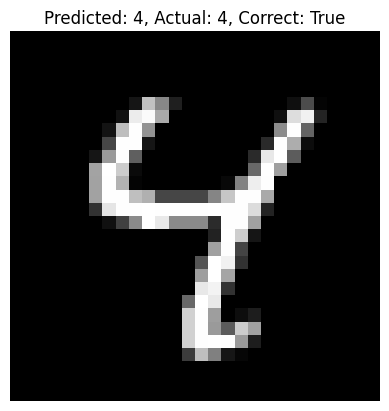

In [14]:
model1.eval()  # Set model to evaluation mode

# Get a batch of test images and labels
images, labels = next(iter(test_loader))
image, true_label = images[6], labels[6]  # Select the first image for checking

# Predict the label for the selected image
with torch.no_grad():  # No need for gradient computation here
    output = model1(image.unsqueeze(0))  # Add batch dimension
    _, predicted_label = torch.max(output, 1)

# Check if the prediction is correct
is_correct = predicted_label == true_label

# Visualize the image and prediction result
plt.imshow(image.squeeze(), cmap='gray')  # Remove channel dimension for visualization
plt.title(f'Predicted: {predicted_label.item()}, Actual: {true_label.item()}, Correct: {is_correct.item()}')
plt.axis('off')
plt.show()

We acn see that there is an improvement in the accuracy and amodel performance after adding another dense layer.

Step 7. Experiment with different optimizers, loss functions, dropout, and activation functions, and observe the change in performance as you tune these hyperparameters.

Adding Dropout layers

In [35]:
class MLP_AddDL(nn.Module):
    def __init__(self):
        super(MLP_AddDL, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.dropout1 = nn.Dropout(0.1)  # Dropout layer after first linear layer
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.1)  # Dropout layer after second linear layer
        self.fc2_5 = nn.Linear(64, 128)  # Additional layer
        self.dropout3 = nn.Dropout(0.1)  # Dropout layer after additional layer
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc2_5(x))
        x = self.dropout3(x)
        x = self.fc3(x)
        return x

model2 = MLP_AddDL()

In [36]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model2.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model2.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.2675545525550842
Epoch 1, Batch 200, Loss: 0.5436155804991722
Epoch 1, Batch 300, Loss: 0.4387856800854206
Epoch 1, Batch 400, Loss: 0.3746230348944664
Epoch 1, Batch 500, Loss: 0.35376942962408064
Epoch 1, Batch 600, Loss: 0.3199564080685377
Epoch 1, Batch 700, Loss: 0.3091106403619051
Epoch 1, Batch 800, Loss: 0.28581266596913335
Epoch 1, Batch 900, Loss: 0.2777516108751297
Epoch 2, Batch 100, Loss: 0.2476237691938877
Epoch 2, Batch 200, Loss: 0.24589599959552288
Epoch 2, Batch 300, Loss: 0.21616417963057757
Epoch 2, Batch 400, Loss: 0.21685473129153252
Epoch 2, Batch 500, Loss: 0.22524874836206435
Epoch 2, Batch 600, Loss: 0.21725828140974046
Epoch 2, Batch 700, Loss: 0.21912647388875484
Epoch 2, Batch 800, Loss: 0.19199519012123345
Epoch 2, Batch 900, Loss: 0.2001044813171029
Epoch 3, Batch 100, Loss: 0.19385657776147128
Epoch 3, Batch 200, Loss: 0.1897732463479042
Epoch 3, Batch 300, Loss: 0.19414142791181802
Epoch 3, Batch 400, Loss: 0.1863589334487915

In [37]:
# Evaluate the model
model2.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { (correct / total)*100}%')

Accuracy on test set: 96.50166666666667%


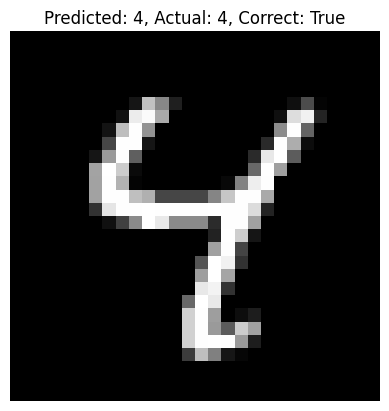

In [38]:
model2.eval()  # Set model to evaluation mode

# Get a batch of test images and labels
images, labels = next(iter(test_loader))
image, true_label = images[6], labels[6]  # Select the first image for checking

# Predict the label for the selected image
with torch.no_grad():  # No need for gradient computation here
    output = model2(image.unsqueeze(0))  # Add batch dimension
    _, predicted_label = torch.max(output, 1)

# Check if the prediction is correct
is_correct = predicted_label == true_label

# Visualize the image and prediction result
plt.imshow(image.squeeze(), cmap='gray')  # Remove channel dimension for visualization
plt.title(f'Predicted: {predicted_label.item()}, Actual: {true_label.item()}, Correct: {is_correct.item()}')
plt.axis('off')
plt.show()

Adding dropout layer did not increase the accuracy let ous see if i change the optimizer for the above network how will that effect the accuracy.

Changed the optimizer from Adam to RMSprop

In [80]:
class MLP_AddDLO(nn.Module):
    def __init__(self):
        super(MLP_AddDLO, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.dropout1 = nn.Dropout(0.1)  # Dropout layer after first linear layer
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.1)  # Dropout layer after second linear layer
        self.fc2_5 = nn.Linear(64, 128)  # Additional layer
        self.dropout3 = nn.Dropout(0.1)  # Dropout layer after additional layer
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc2_5(x))
        x = self.dropout3(x)
        x = self.fc3(x)
        return x

model3 = MLP_AddDLO()

In [84]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model3.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model3.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.139402641057968
Epoch 1, Batch 200, Loss: 0.529159117937088
Epoch 1, Batch 300, Loss: 0.4380942507088184
Epoch 1, Batch 400, Loss: 0.39476252764463426
Epoch 1, Batch 500, Loss: 0.36607817888259886
Epoch 1, Batch 600, Loss: 0.3368837779760361
Epoch 1, Batch 700, Loss: 0.31176011718809604
Epoch 1, Batch 800, Loss: 0.3195114232599735
Epoch 1, Batch 900, Loss: 0.3002930670976639
Epoch 2, Batch 100, Loss: 0.2762634764611721
Epoch 2, Batch 200, Loss: 0.25750309847295283
Epoch 2, Batch 300, Loss: 0.2521241348236799
Epoch 2, Batch 400, Loss: 0.244359125867486
Epoch 2, Batch 500, Loss: 0.23663257028907536
Epoch 2, Batch 600, Loss: 0.22684146210551262
Epoch 2, Batch 700, Loss: 0.22049324937164783
Epoch 2, Batch 800, Loss: 0.22641958255320788
Epoch 2, Batch 900, Loss: 0.2080062397569418
Epoch 3, Batch 100, Loss: 0.20562859423458577
Epoch 3, Batch 200, Loss: 0.20302434701472521
Epoch 3, Batch 300, Loss: 0.19077562138438225
Epoch 3, Batch 400, Loss: 0.19076983112841844
E

In [85]:
# Evaluate the model
model3.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model3(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { (correct / total)*100}%')

Accuracy on test set: 96.40333333333334%


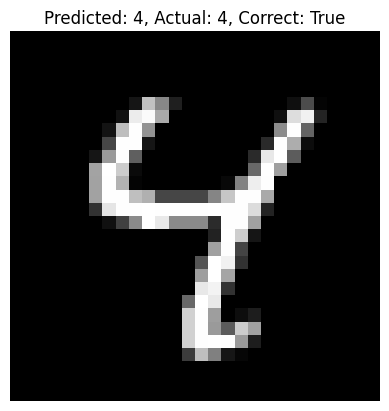

In [86]:
model3.eval()  # Set model to evaluation mode

# Get a batch of test images and labels
images, labels = next(iter(test_loader))
image, true_label = images[6], labels[6]  # Select the first image for checking

# Predict the label for the selected image
with torch.no_grad():  # No need for gradient computation here
    output = model3(image.unsqueeze(0))  # Add batch dimension
    _, predicted_label = torch.max(output, 1)

# Check if the prediction is correct
is_correct = predicted_label == true_label

# Visualize the image and prediction result
plt.imshow(image.squeeze(), cmap='gray')  # Remove channel dimension for visualization
plt.title(f'Predicted: {predicted_label.item()}, Actual: {true_label.item()}, Correct: {is_correct.item()}')
plt.axis('off')
plt.show()

There is no much difference in the accuracy. The accuracy reduced by few decimals